In [1]:
import graphlab 
import os
os.chdir('C:\Users\suh0902\Desktop\CP\dataset')

# Fire up with graphlab.SFrame

In [2]:
wal_data = graphlab.SFrame('train.csv')

[INFO] This non-commercial license of GraphLab Create is assigned to spectacle2002@gmail.com and will expire on September 22, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-12052 - Server binary: c:\users\suh0902\appdata\local\dato\dato launcher\lib\site-packages\graphlab\unity_server.exe - Server log: C:\Users\suh0902\AppData\Local\Temp\graphlab_server_1447639883.log.0
[INFO] GraphLab Server Version: 1.6.1


PROGRESS: Finished parsing file C:\Users\suh0902\Desktop\CP\dataset\train.csv
PROGRESS: Parsing completed. Parsed 100 lines in 1.7381 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[long,long,str,long,long,str,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file C:\Users\suh0902\Desktop\CP\dataset\train.csv
PROGRESS: Parsing completed. Parsed 647054 lines in 0.866576 secs.


# Description from Kaggle(Walmart Recruiting: Trip Type Classification - from Mon 26 Oct 2015 to Sun 27 Dec 2015)
## For this competition, you are tasked with categorizing shopping trip types based on the 
## items that customers purchased. To give a few hypothetical examples of trip types: a 
## customer may make a small daily dinner trip, a weekly large grocery trip, a trip to buy gifts  for an upcoming holiday, or a seasonal trip to buy clothes.

## Walmart has categorized the trips contained in this data into 38 distinct types using a   proprietary method applied to an extended set of data. You are challenged to recreate this  categorization/clustering with a more limited set of features. This could provide new and  more robust ways to categorize trips.

## The training set (train.csv) contains a large number of customer visits with the TripType 
## included. You must predict the TripType for each customer visit in the test set (test.csv).  Each visit may only have one TripType. You will not be provided with more information 
## than what is given in the data (e.g. what the TripTypes represent or more product 
## information).

In [3]:
wal_data

TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000
30,7,Friday,60538815980,1,SHOES,8931
30,7,Friday,7410811099,1,PERSONAL CARE,4504
26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565
26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017
26,8,Friday,2006618783,2,PAINT AND ACCESSORIES,1017
26,8,Friday,2006613743,1,PAINT AND ACCESSORIES,1017
26,8,Friday,7004802737,1,PAINT AND ACCESSORIES,2802
26,8,Friday,2238495318,1,PAINT AND ACCESSORIES,4501
26,8,Friday,2238400200,-1,PAINT AND ACCESSORIES,3565


# Data fields
## TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
## VisitNumber - an id corresponding to a single trip by a single customer
## Weekday - the weekday of the trip
## Upc - the UPC number of the product purchased
## ScanCount - the number of the given item that was purchased. A negative value indicates a product return.
## DepartmentDescription - a high-level description of the item's department
## FinelineNumber - a more refined category for each of the products, created by Walmart

In [4]:
wal_data.tail()

TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
39,191346,Sunday,5100019880,1,GROCERY DRY GOODS,3107
39,191346,Sunday,7874203977,1,DAIRY,7955
39,191346,Sunday,3120020235,1,DSD GROCERY,4639
39,191346,Sunday,3120033013,1,DSD GROCERY,4639
39,191346,Sunday,3700091229,1,HOUSEHOLD CHEMICALS/SUPP,8947
39,191346,Sunday,32390001778,1,PHARMACY OTC,1118
39,191346,Sunday,7874205336,1,FROZEN FOODS,1752
39,191346,Sunday,4072,1,PRODUCE,4170
8,191347,Sunday,4190007664,1,DAIRY,1512
8,191347,Sunday,3800059655,1,GROCERY DRY GOODS,3600


In [5]:
graphlab.canvas.set_target('ipynb') 

In [6]:
wal_data['TripType'].show()

In [7]:
wal_data['VisitNumber'].show()

In [8]:
wal_data['Weekday'].show()

In [9]:
wal_data['Upc'].show()

In [10]:
wal_data['ScanCount'].show()

In [11]:
wal_data['DepartmentDescription'].show()

In [12]:
wal_data['FinelineNumber'].show()

In [13]:
with open('train.csv') as f:
    for i in xrange(10):
        print f.readline().strip()

"TripType","VisitNumber","Weekday","Upc","ScanCount","DepartmentDescription","FinelineNumber"
999,5,"Friday",68113152929,-1,"FINANCIAL SERVICES",1000
30,7,"Friday",60538815980,1,"SHOES",8931
30,7,"Friday",7410811099,1,"PERSONAL CARE",4504
26,8,"Friday",2238403510,2,"PAINT AND ACCESSORIES",3565
26,8,"Friday",2006613744,2,"PAINT AND ACCESSORIES",1017
26,8,"Friday",2006618783,2,"PAINT AND ACCESSORIES",1017
26,8,"Friday",2006613743,1,"PAINT AND ACCESSORIES",1017
26,8,"Friday",7004802737,1,"PAINT AND ACCESSORIES",2802
26,8,"Friday",2238495318,1,"PAINT AND ACCESSORIES",4501


In [14]:
import pandas as pd

In [15]:
wal_data = pd.read_csv("train.csv")

In [16]:
wal_data.head()


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000
1,30,7,Friday,60538815980,1,SHOES,8931
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017


In [17]:
wal_data.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,32390001778,1,PHARMACY OTC,1118
647050,39,191346,Sunday,7874205336,1,FROZEN FOODS,1752
647051,39,191346,Sunday,4072,1,PRODUCE,4170
647052,8,191347,Sunday,4190007664,1,DAIRY,1512
647053,8,191347,Sunday,3800059655,1,GROCERY DRY GOODS,3600


In [18]:
wal_data['TripType'].describe()

count    647054.000000
mean         58.584511
std         157.635533
min           3.000000
25%          27.000000
50%          39.000000
75%          40.000000
max         999.000000
Name: TripType, dtype: float64

In [19]:
wal_data['VisitNumber'].describe()

count    647054.000000
mean      96167.640078
std       55545.485154
min           5.000000
25%       49268.000000
50%       97074.000000
75%      144316.000000
max      191347.000000
Name: VisitNumber, dtype: float64

In [20]:
wal_data['Weekday'].describe()

count     647054
unique         7
top       Sunday
freq      133975
Name: Weekday, dtype: object

In [21]:
wal_data['Upc'].describe()

count    6.429250e+05
mean     3.060698e+10
std      9.120134e+10
min      8.340000e+02
25%      3.400001e+09
50%      7.050103e+09
75%      3.006531e+10
max      9.789707e+11
Name: Upc, dtype: float64

In [22]:
wal_data['DepartmentDescription'].describe()

count                645693
unique                   68
top       GROCERY DRY GOODS
freq                  70402
Name: DepartmentDescription, dtype: object

In [23]:
wal_data['ScanCount'].describe()

count    647054.000000
mean          1.108878
std           0.700776
min         -12.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          71.000000
Name: ScanCount, dtype: float64

In [24]:
wal_data['FinelineNumber'].describe()

count    642925.000000
mean       3726.884567
std        2780.966158
min           0.000000
25%        1404.000000
50%        3352.000000
75%        5501.000000
max        9998.000000
Name: FinelineNumber, dtype: float64

In [32]:
import brewer2mpl
import ggplot as gg
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
%pylab inline
import seaborn as sns
import numpy as np


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Exploring data

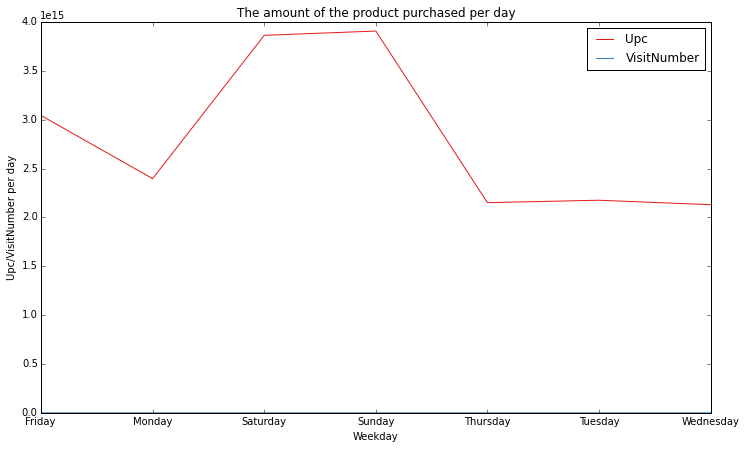

In [26]:
wal_data_weekend=wal_data[["Weekday","Upc","VisitNumber"]].groupby("Weekday").sum()
fig, ax = pylab.subplots(figsize=(12, 7))
set1 = brewer2mpl.get_map('Set1', 'qualitative', 3).mpl_colors
wal_data_weekend.plot(ax=ax, color=set1)
ax.set_title("The amount of the product purchased per day")
ax.legend(["Upc", "VisitNumber"])
ax.set_ylabel("Upc/VisitNumber per day")
ax.set_xlabel("Weekday")


In [27]:
wal_data.groupby('Weekday')

In [29]:
wal_data.groupby('Weekday').groups

{'Friday': [0L,
  1L,
  2L,
  3L,
  4L,
  5L,
  6L,
  7L,
  8L,
  9L,
  10L,
  11L,
  12L,
  13L,
  14L,
  15L,
  16L,
  17L,
  18L,
  19L,
  20L,
  21L,
  22L,
  23L,
  24L,
  25L,
  26L,
  27L,
  28L,
  29L,
  30L,
  31L,
  32L,
  33L,
  34L,
  35L,
  36L,
  37L,
  38L,
  39L,
  40L,
  41L,
  42L,
  43L,
  44L,
  45L,
  46L,
  47L,
  48L,
  49L,
  50L,
  51L,
  52L,
  53L,
  54L,
  55L,
  56L,
  57L,
  58L,
  59L,
  60L,
  61L,
  62L,
  63L,
  64L,
  65L,
  66L,
  67L,
  68L,
  69L,
  70L,
  71L,
  72L,
  73L,
  74L,
  75L,
  76L,
  77L,
  78L,
  79L,
  80L,
  81L,
  82L,
  83L,
  84L,
  85L,
  86L,
  87L,
  88L,
  89L,
  90L,
  91L,
  92L,
  93L,
  94L,
  95L,
  96L,
  97L,
  98L,
  99L,
  100L,
  101L,
  102L,
  103L,
  104L,
  105L,
  106L,
  107L,
  108L,
  109L,
  110L,
  111L,
  112L,
  113L,
  114L,
  115L,
  116L,
  117L,
  118L,
  119L,
  120L,
  121L,
  122L,
  123L,
  124L,
  125L,
  126L,
  127L,
  128L,
  129L,
  130L,
  131L,
  132L,
  133L,
  134L,
  135L,
  136L,
  13

In [30]:
wal_data.groupby('Weekday').mean()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
Weekday,,,,,
Friday,59.383628,90314.984446,3.184270e+10,1.111152,3693.001109
Monday,59.642692,87917.423241,2.904476e+10,1.111993,3764.011192
Saturday,56.050878,94293.450277,3.183272e+10,1.106981,3708.834634
Sunday,54.830073,102675.025355,2.930046e+10,1.105803,3780.226434
Thursday,61.754363,103854.384892,3.191295e+10,1.109929,3692.346811
Tuesday,61.508404,93570.712915,3.026187e+10,1.112203,3708.464682
Wednesday,61.677691,99993.713155,3.022466e+10,1.106813,3711.336742


In [31]:
wal_data.groupby('Weekday').mean()['ScanCount']

Weekday
Friday       1.111152
Monday       1.111993
Saturday     1.106981
Sunday       1.105803
Thursday     1.109929
Tuesday      1.112203
Wednesday    1.106813
Name: ScanCount, dtype: float64

In [35]:
SC_by_day = wal_data.groupby('Weekday').mean()['ScanCount']

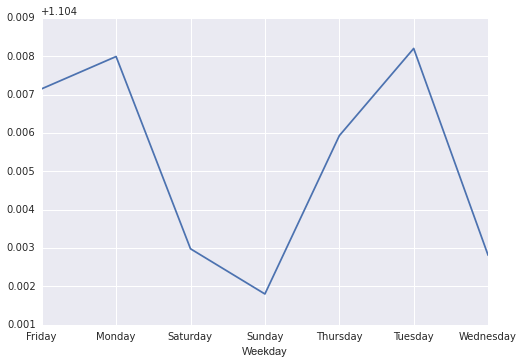

In [36]:
SC_by_day.plot()

In [40]:
UPC_by_day = wal_data.groupby('Weekday').mean()['Upc']

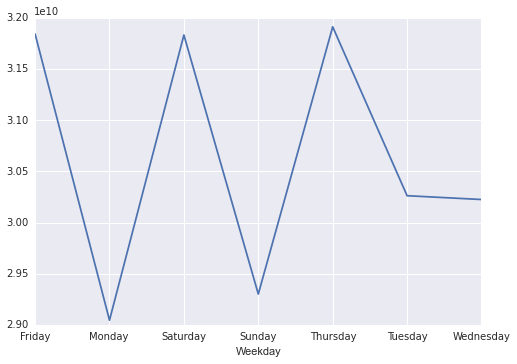

In [38]:
UPC_by_day.plot()

In [41]:
VisitNumber_by_day = wal_data.groupby('Weekday').mean()['VisitNumber']

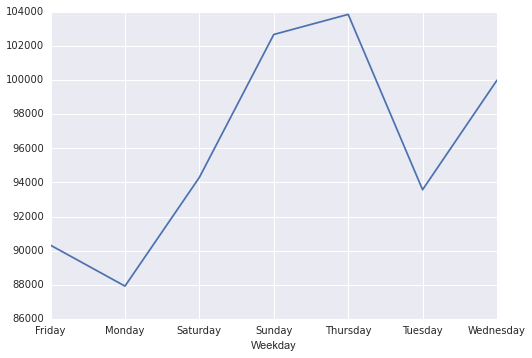

In [42]:
VisitNumber_by_day.plot()

In [43]:
TripType_by_day = wal_data.groupby('Weekday').mean()['TripType']

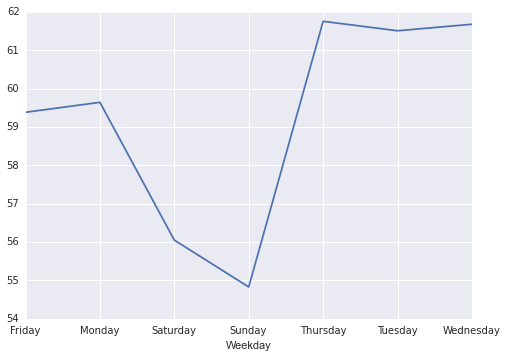

In [44]:
TripType_by_day.plot()